<a href="https://colab.research.google.com/github/pedrociancaglini/datascience101/blob/main/6_Advance_Visualization_PyAZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

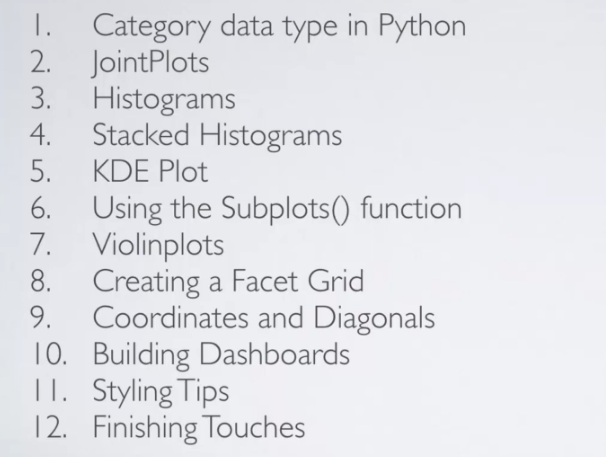

In [ ]:
# NOTEBOOK HEAD
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4
import warnings
warnings.filterwarnings('ignore')
import os
path = 'C:\\Users\\pedro\\OneDrive - Ciancaglini Safar\\EDx\\Data\\PyAZ\\6.AdvanceVisualization' #'C:\\Users\\pedro'
os.chdir(path)
os.getcwd()

'C:\\Users\\pedro\\OneDrive - Ciancaglini Safar\\EDx\\Data\\PyAZ\\6.AdvanceVisualization'

In [ ]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [ ]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [ ]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRatings',
       'BudgetMillions', 'Year']
movies.head()

,Film,Genre,CriticRating,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             559 non-null    object
 1   Genre            559 non-null    object
 2   CriticRating     559 non-null    int64 
 3   AudienceRatings  559 non-null    int64 
 4   BudgetMillions   559 non-null    int64 
 5   Year             559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [ ]:
movies.describe()

,CriticRating,AudienceRatings,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [ ]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   CriticRating     559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   BudgetMillions   559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [ ]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [ ]:
movies.describe()

,CriticRating,AudienceRatings,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---
## Joinplots

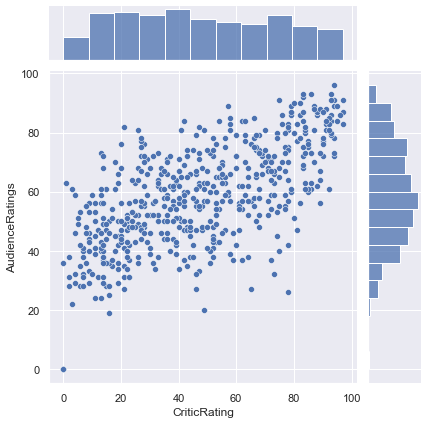

In [ ]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRatings')

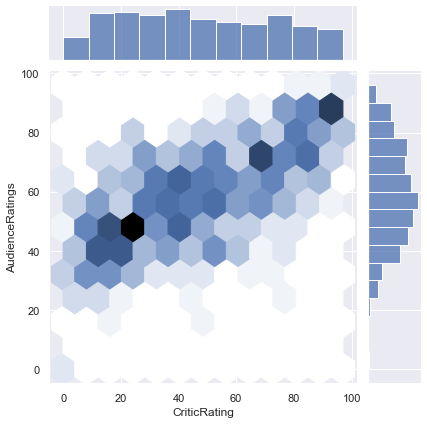

In [ ]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRatings',kind='hex')

---
Histograms

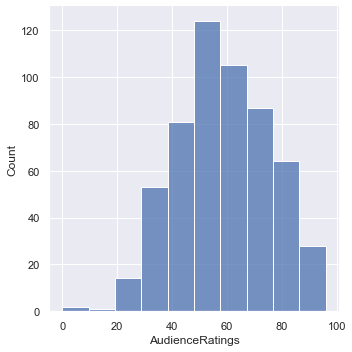

In [ ]:
ml = sns.displot(movies.AudienceRatings, bins=10)

## Stacked Histograms in Python

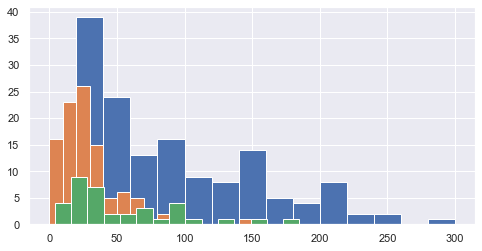

In [ ]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

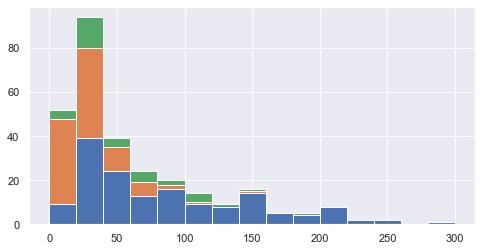

In [ ]:
data_hist = [movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Drama'].BudgetMillions, movies[movies.Genre == 'Thriller'].BudgetMillions]
plt.hist(data_hist, bins=15, stacked=True)
plt.show()

In [ ]:
for gen in movies.Genre.cat.categories:
  print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


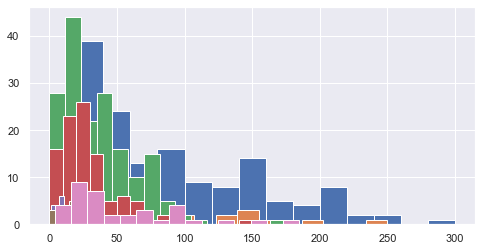

In [ ]:
for gen in movies.Genre.cat.categories:
  plt.hist(movies[movies.Genre == gen].BudgetMillions, bins=15, stacked=True)

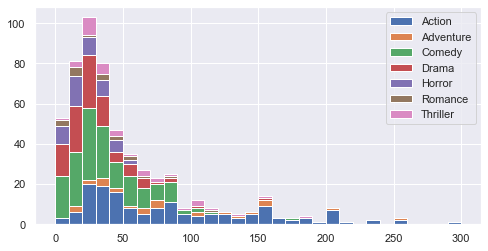

In [ ]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
  list1.append(movies[movies.Genre == gen].BudgetMillions)
  mylabels.append(gen)

plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

---
## KDE Plot

Kernel Density Estimate Plot

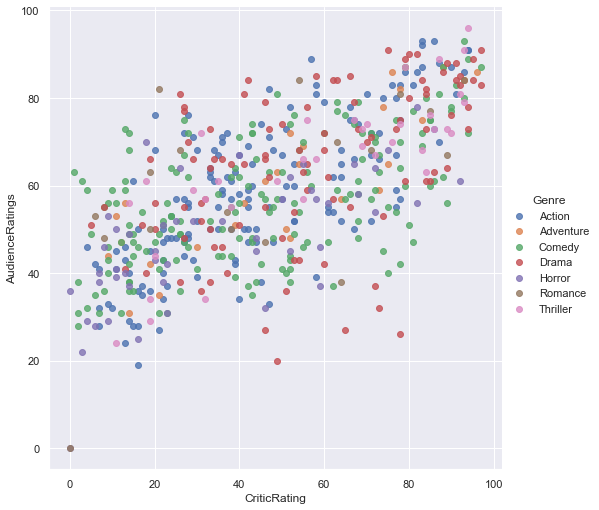

In [ ]:
# Scatterplot first
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRatings',
                  fit_reg=False, hue='Genre',
                  size=7, aspect=1)

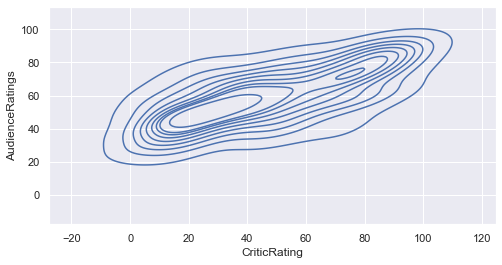

In [ ]:
vis2 = sns.kdeplot(movies.CriticRating, movies.AudienceRatings)

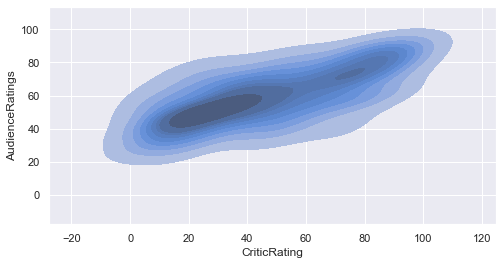

In [ ]:
vis3 = sns.kdeplot(movies.CriticRating, movies.AudienceRatings, shade=True)

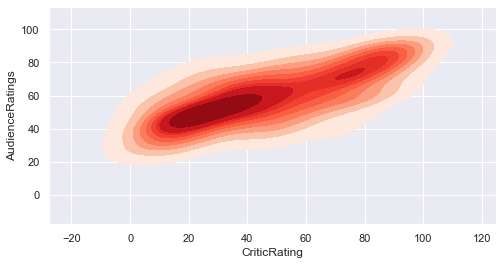

In [ ]:
vis4 = sns.kdeplot(movies.CriticRating, movies.AudienceRatings, shade=True, cmap='Reds')

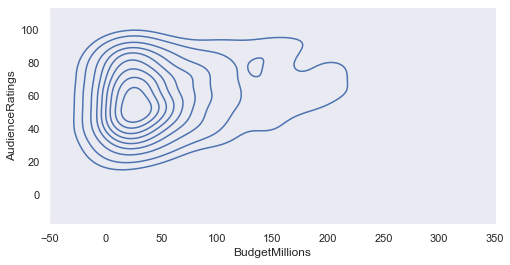

In [ ]:
sns.set_style('dark')
vis5 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings)

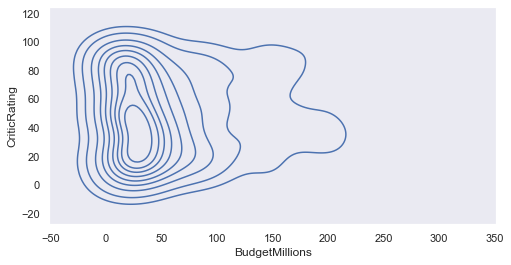

In [ ]:
vis6 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

---
Subplots

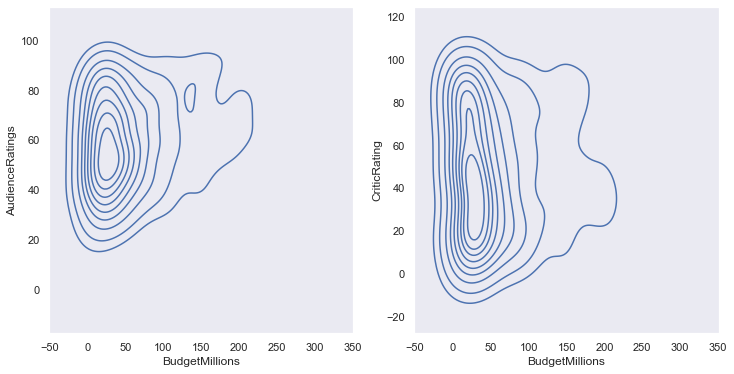

In [ ]:
f, axes = plt.subplots(1,2, figsize=(12,6))
vis7 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=axes[0])
vis8 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])

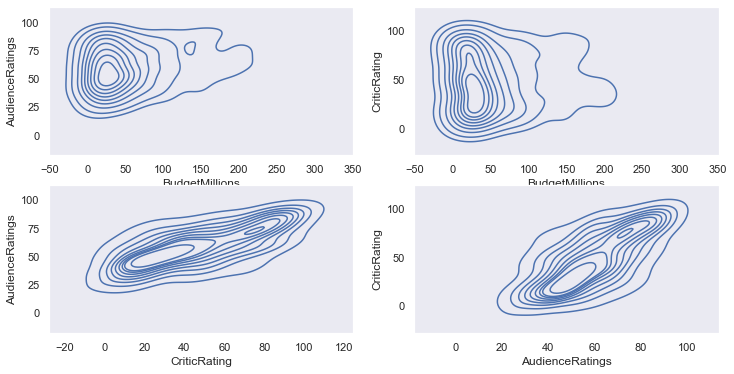

In [ ]:
f, axes = plt.subplots(2,2, figsize=(12,6))
vis9 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=axes[0,0])
vis10 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
vis11 = sns.kdeplot(movies.CriticRating, movies.AudienceRatings, ax=axes[1,0])
vis12 = sns.kdeplot(movies.AudienceRatings, movies.CriticRating, ax=axes[1,1])

---
## Violin Plots

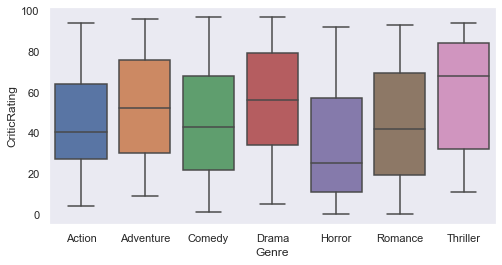

In [ ]:
vis13 = sns.boxplot(data=movies, x='Genre',y='CriticRating') # This is a regular boxplot

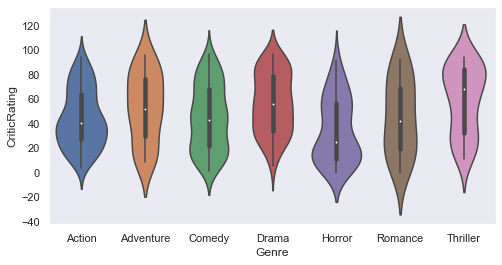

In [ ]:
vis14 = sns.violinplot(data=movies, x='Genre',y='CriticRating') # Syntax similar to boxplot

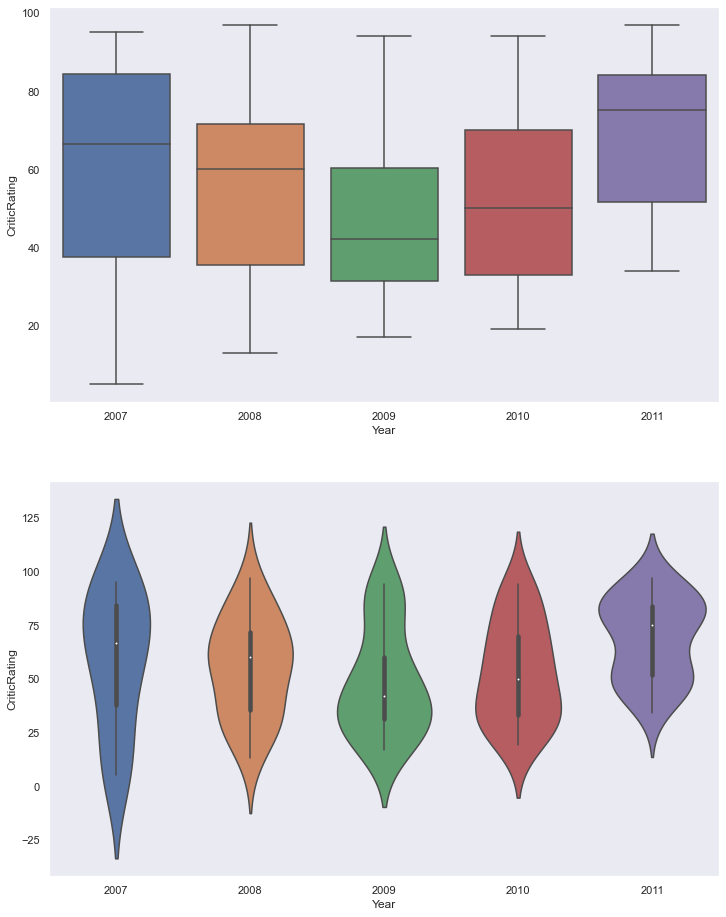

In [ ]:
f, axes = plt.subplots(2,1, figsize=(12,16))
vis15 = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year',y='CriticRating', ax=axes[0]) # This is a regular boxplot
vis16 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year',y='CriticRating', ax=axes[1]) # Syntax similar to boxplot

---
Faced Grid

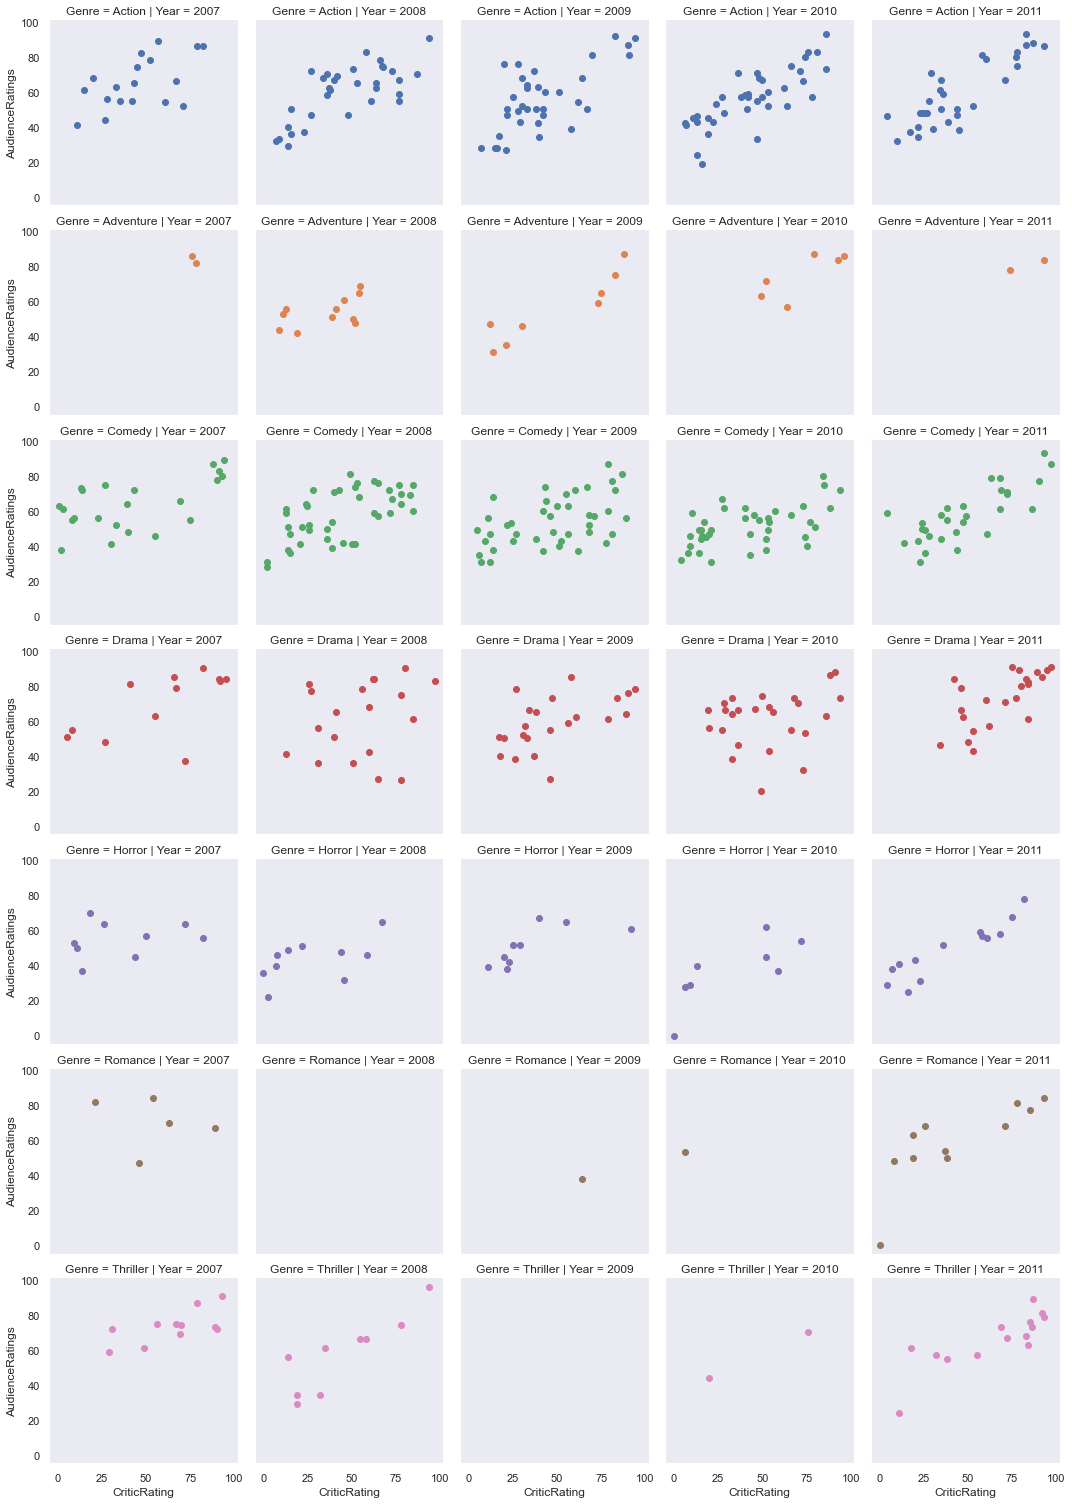

In [ ]:
vis17 = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
vis17 = vis17.map(plt.scatter, 'CriticRating', 'AudienceRatings')

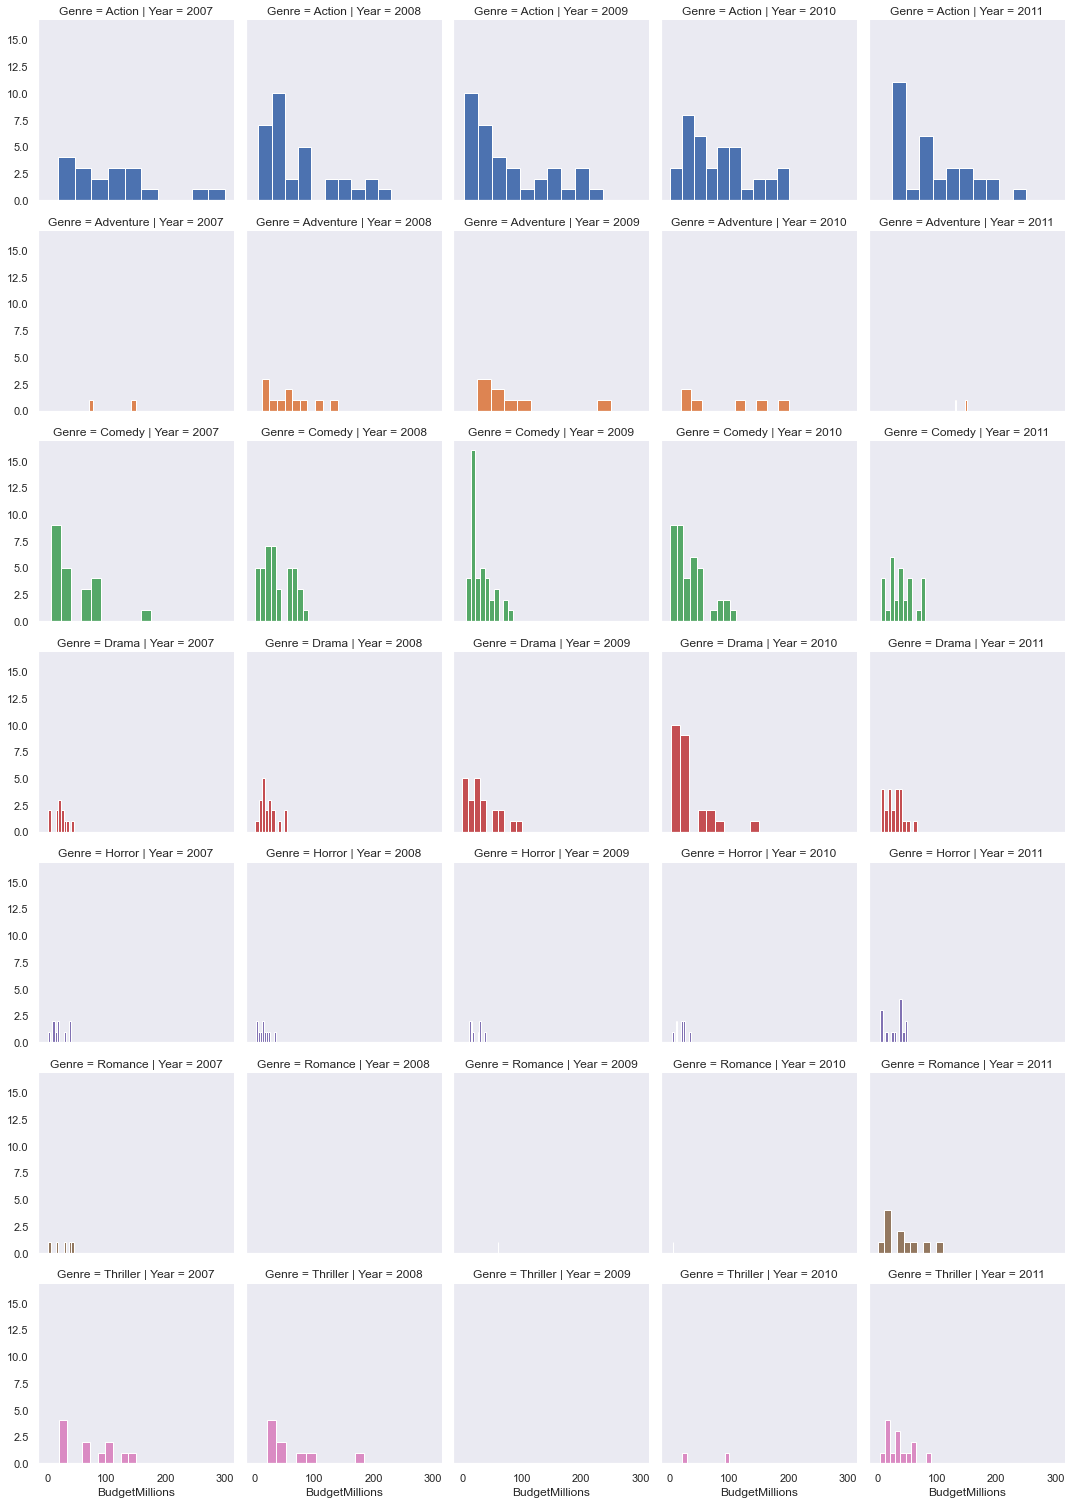

In [ ]:
vis18 = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
vis18 = vis18.map(plt.hist, 'BudgetMillions')

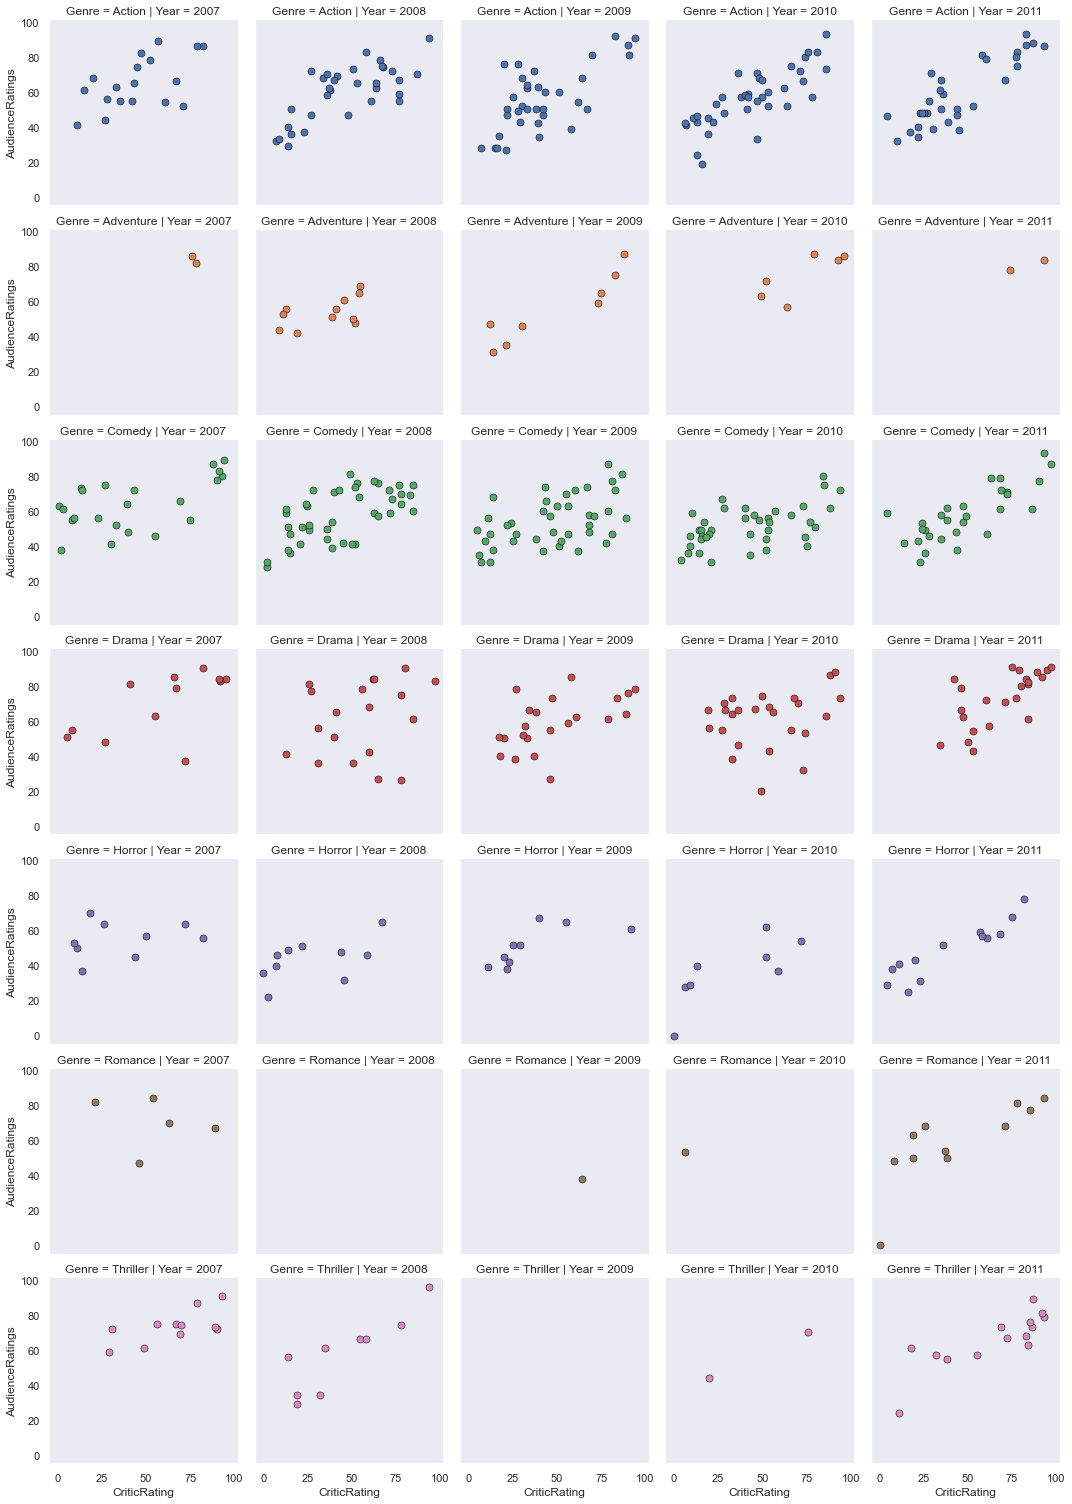

In [ ]:
vis18 = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5,edgecolor='black')
vis18 = vis18.map(plt.scatter, 'CriticRating', 'AudienceRatings', **kws)

---
## Coordinates and Diagonals

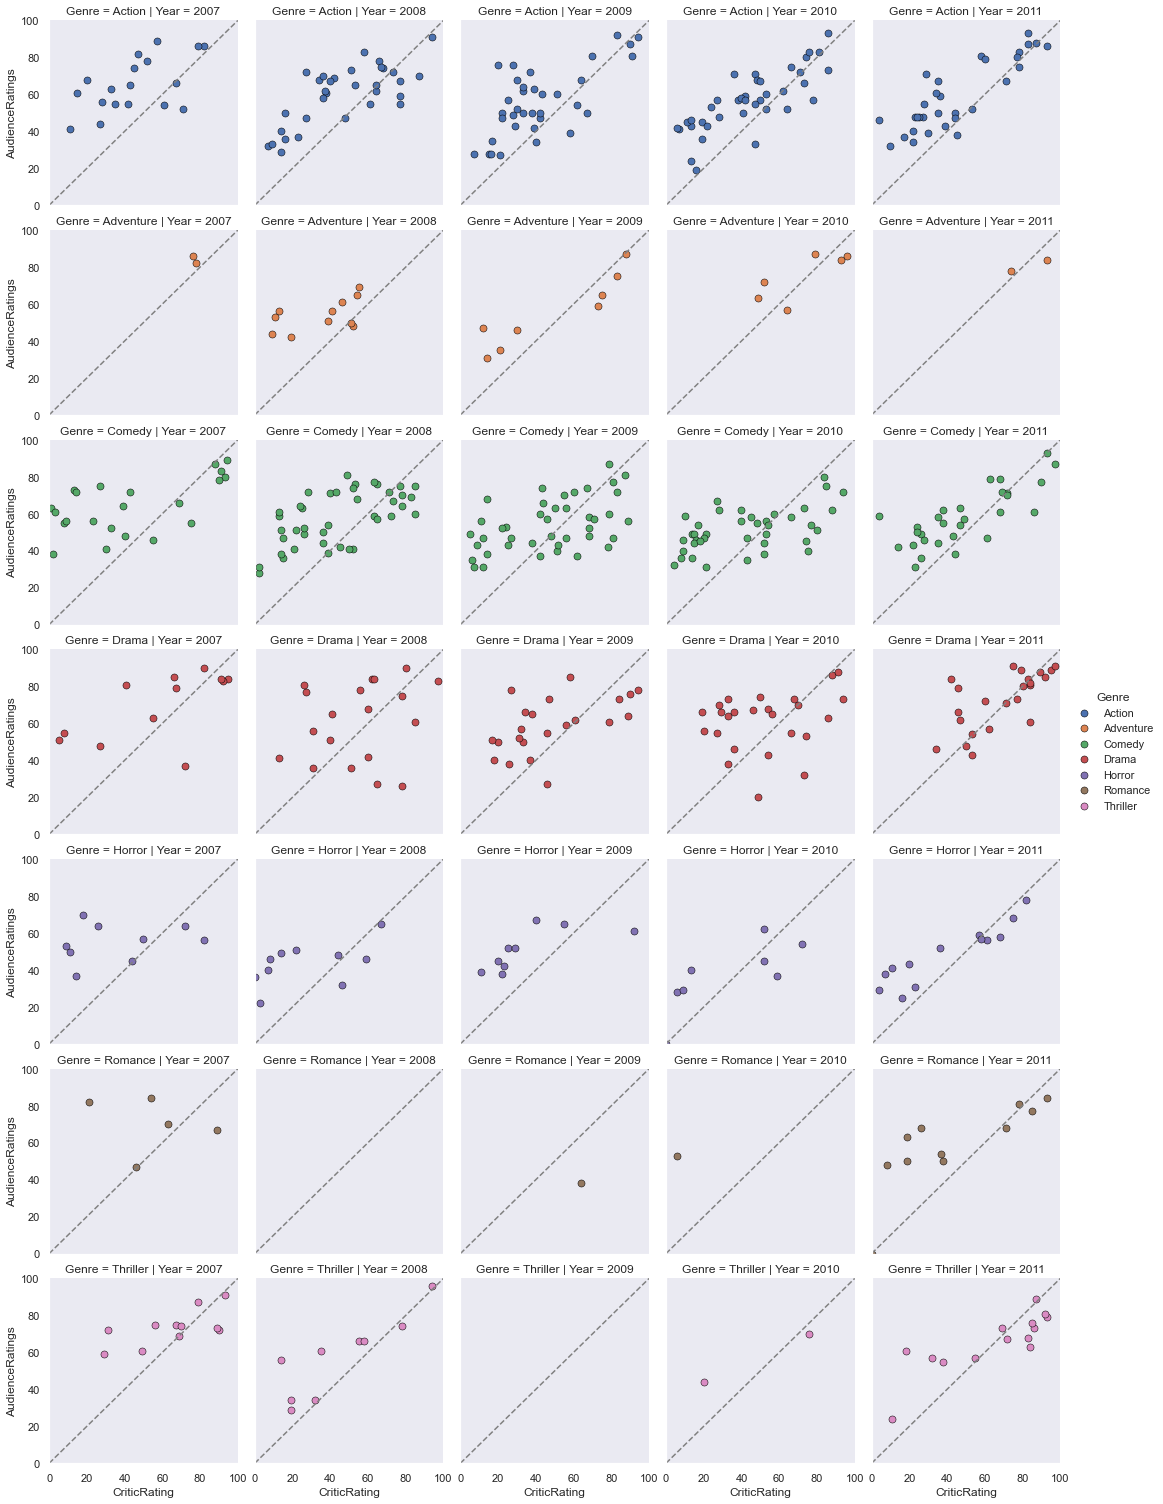

In [ ]:
vis19 = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5,edgecolor='black')
vis19 = vis19.map(plt.scatter, 'CriticRating', 'AudienceRatings', **kws)

# Setting limits
vis19.set(xlim=(0,100),ylim=(0,100))

# Creating a diagonal line in each scatterplot
for ax in vis19.axes.flat:
    ax.plot((0,100),(0,100), c='gray',ls='--')

vis19.add_legend()

---
## Creating Dashboards with Python

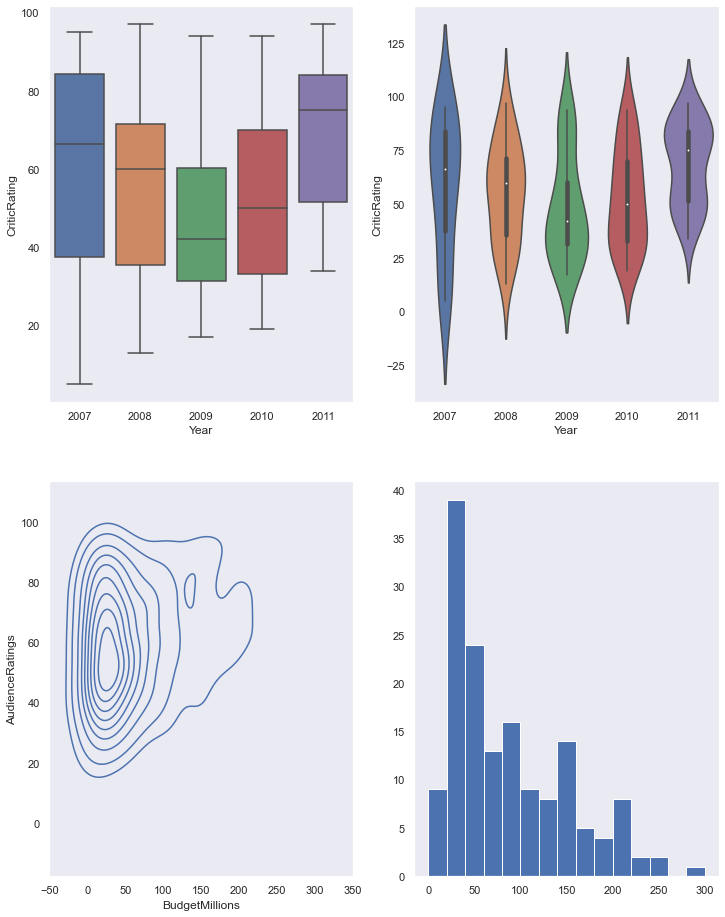

In [ ]:
f, axes = plt.subplots(2,2, figsize=(12,16))
dash1 = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year',y='CriticRating', ax=axes[0,0]) # This is a regular boxplot
dash2 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year',y='CriticRating', ax=axes[0,1]) # Syntax similar to boxplot
dash3 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=axes[1,0])
#dash4 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1,1])
axes[1,1].hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.show()

---
## Styling Dashboard

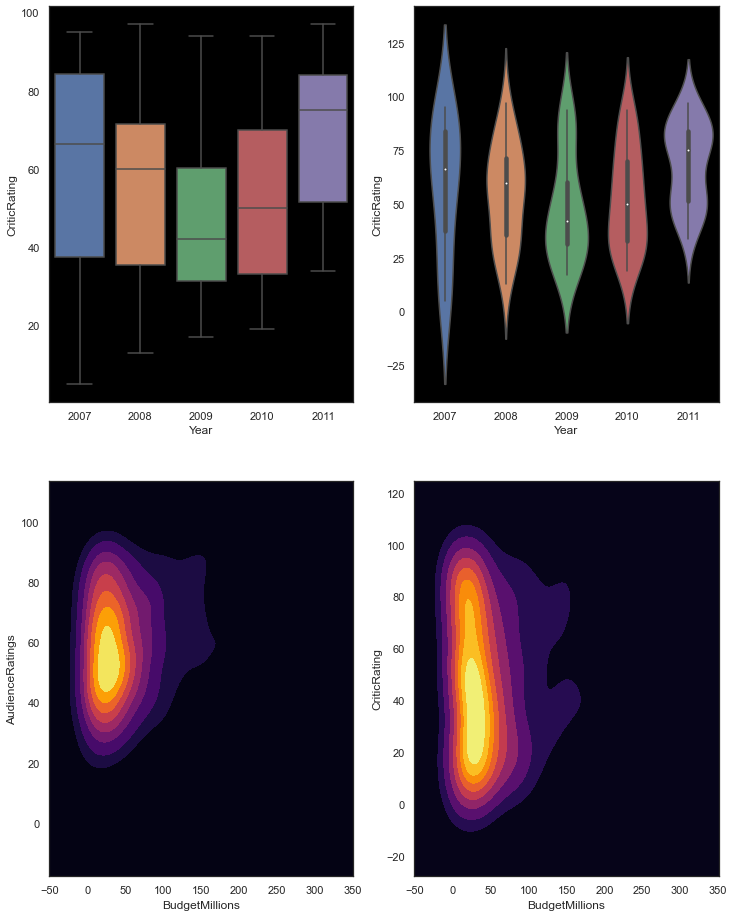

In [ ]:
# Setting styles in dashboard
sns.set_style('white',{'axes.facecolor':'black'})


f, axes = plt.subplots(2,2, figsize=(12,16))

dash5 = sns.boxplot(data=movies[movies.Genre=='Drama'], 
                    x='Year',y='CriticRating', 
                    ax=axes[0,0]) # This is a regular boxplot

dash6 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year',y='CriticRating', ax=axes[0,1]) # Syntax similar to boxplot

dash7 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, 
                    ax=axes[1,0],
                    cmap='inferno', shade=True, shade_lowest=True)

dash8 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, 
                    ax=axes[1,1],
                    cmap='inferno', shade=True, shade_lowest=True)

#axes[1,1].hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.show()

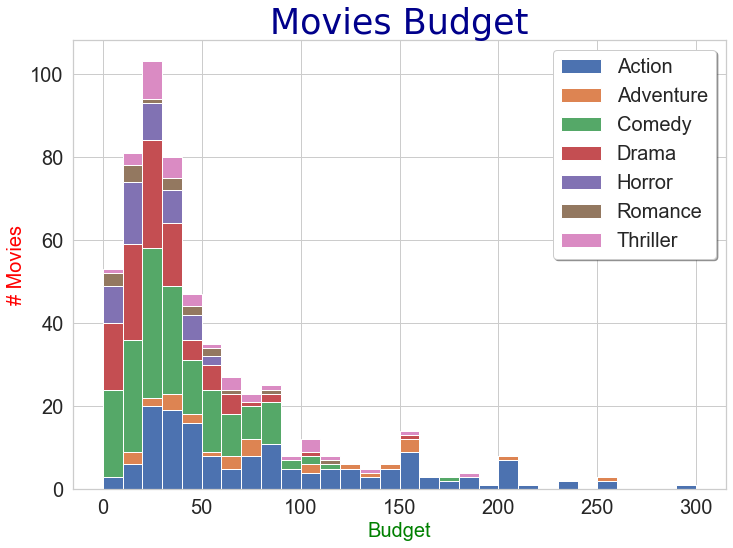

In [ ]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
  list1.append(movies[movies.Genre == gen].BudgetMillions)
  mylabels.append(gen)

sns.set_style('whitegrid')
fig, axes = plt.subplots()
fig.set_size_inches(11.7,8.27) # Size of A4 paper


plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)

plt.title('Movies Budget', fontsize=35, color='darkblue', fontname='Console')
plt.xlabel('Budget', fontsize=20, color='Green')
plt.ylabel('# Movies', fontsize=20, color='Red')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.legend(frameon=True, prop={'size':20}, fancybox=True, shadow=True,
           framealpha=1)
plt.show()